# OpenCV

## 1. Installing OpenCV

In [3]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/fb/c4/f574ba6f04e6d7bf8c38d23e7a52389566dd7631fee0bcdd79ea07ef2dbf/opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl (38.1 MB)


In [4]:
pip list

Package                   Version
------------------------- -----------
anyio                     3.7.1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.2.3
asttokens                 2.2.1
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.12.1
backcall                  0.2.0
beautifulsoup4            4.12.2
bleach                    6.0.0
certifi                   2023.7.22
cffi                      1.15.1
charset-normalizer        3.2.0
colorama                  0.4.6
comm                      0.1.4
contourpy                 1.1.0
cycler                    0.11.0
debugpy                   1.6.7.post1
decorator                 5.1.1
defusedxml                0.7.1
executing                 1.2.0
fastjsonschema            2.18.0
fonttools                 4.42.1
fqdn                      1.5.1
idna                      3.4
ipykernel                 6.25.1
ipython                   8.14.0
ipython-genut

## 2. Import OpenCV & Dependencies

In [1]:
import cv2 as cv

In [3]:
import os

In [4]:
!pip install matplotlib

In [2]:
from matplotlib import pyplot as plt

## 3. Read in Image

In [29]:
gohan = cv.imread('gohan.jpg')

In [11]:
gohan.shape # (height, weidth, channel)

(511, 512, 3)

In [12]:
krilin = cv.imread('krilin.jpg')

In [13]:
krilin.shape

(480, 640, 3)

In [ ]:
# show image

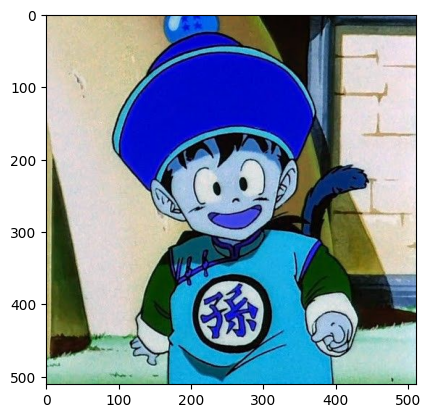

In [25]:
plt.imshow(gohan)
plt.show()

In [18]:
recolor_gohan = cv.cvtColor(gohan, cv.COLOR_BGR2RGB)

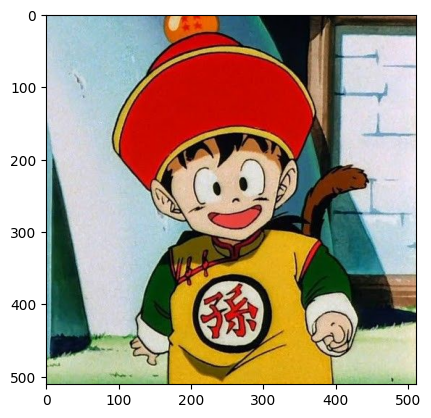

In [24]:
plt.imshow( recolor_gohan)
plt.show()

In [21]:
grey_gohan = cv.cvtColor(gohan, cv.COLOR_BGR2GRAY)

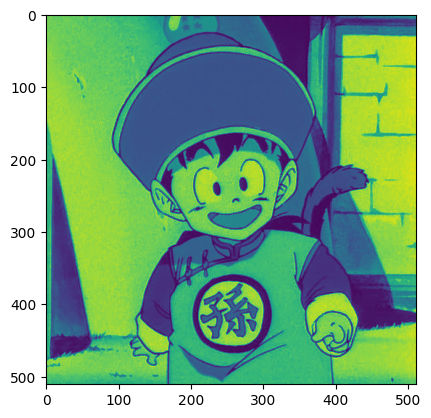

In [23]:
plt.imshow(grey_gohan)
plt.show()

## 4. Write out Image

In [27]:
cv.imwrite("grey_gohan.jpg", grey_gohan)

True

## VIDEO

## 5. Setting up a Captures

In [28]:
os.path.join('data','sample_video.mp4')

'data\\sample_video.mp4'

In [44]:
# setup capture to video
cap = cv.VideoCapture(os.path.join('data','sample_video.mp4'))

In [36]:
# Grab a frome
ret, frame = cap.read()
# ret = return value i.e. True/False

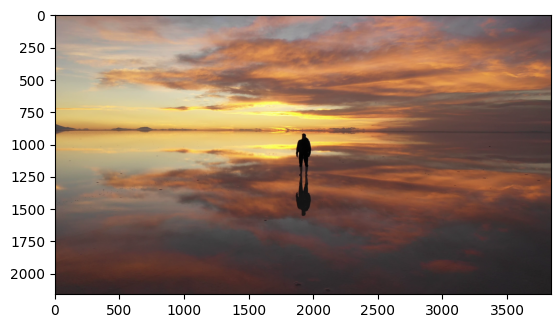

In [40]:
# render frame
plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
plt.show()

In [50]:
# Release capture
cap.release()

In [45]:
cap.read()

(True,
 array([[[118, 130, 161],
         [118, 130, 161],
         [118, 130, 161],
         ...,
         [ 84,  72,  79],
         [ 84,  72,  79],
         [ 84,  72,  79]],
 
        [[118, 130, 161],
         [118, 130, 161],
         [118, 130, 161],
         ...,
         [ 84,  72,  79],
         [ 84,  72,  79],
         [ 84,  72,  79]],
 
        [[118, 130, 161],
         [118, 130, 161],
         [118, 130, 161],
         ...,
         [ 84,  72,  79],
         [ 84,  72,  79],
         [ 84,  72,  79]],
 
        ...,
 
        [[ 41,  40,  50],
         [ 41,  40,  50],
         [ 41,  40,  50],
         ...,
         [ 36,  35,  37],
         [ 33,  32,  34],
         [ 33,  32,  34]],
 
        [[ 41,  40,  50],
         [ 41,  40,  50],
         [ 41,  40,  50],
         ...,
         [ 33,  32,  34],
         [ 32,  31,  33],
         [ 32,  31,  33]],
 
        [[ 41,  40,  50],
         [ 41,  40,  50],
         [ 41,  40,  50],
         ...,
         [ 32,  31,  

## 6. Capture Properties

In [46]:
# Height
cap.get(cv.CAP_PROP_FRAME_HEIGHT)

2160.0

In [47]:
# Width
cap.get(cv.CAP_PROP_FRAME_WIDTH)

3840.0

In [48]:
# Number of frames
cap.get(cv.CAP_PROP_FRAME_COUNT)

1404.0

In [49]:
# FPS
cap.get(cv.CAP_PROP_FPS)

29.97002997002997

## 7 Working with Video Captures

In [6]:
# Establish capture
cap = cv.VideoCapture(os.path.join('data','sample_video.mp4'))
# loop through each frame
for frame_idx in range(int(cap.get(cv.CAP_PROP_FRAME_COUNT))):
    # Read frame
    ret, frame = cap.read()
    
    # Gray transform
    grey = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # Show image
    
    cv.namedWindow('video player', cv.WINDOW_NORMAL) # Create a window to display the image
    cv.resizeWindow('video player', 1280, 960) # Set the size of the window to match the image dimensions
    cv.imshow('video player', grey)
    
    # Breaking out of the loop
    if cv.waitKey(20) & 0xFF == ord('q'):
        break

# Release the capture
cap.release()
# Colse down all windows
cv.destroyAllWindows()

## 8. Write out Video

In [9]:
# Establish capture
cap = cv.VideoCapture(os.path.join('data','sample_video.mp4'))

# Setup Video writer
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
fps = cap.get(cv.CAP_PROP_FPS)

video_write = cv.VideoWriter(os.path.join('output','output.avi'), cv.VideoWriter_fourcc('P','I','M','1'), fps, (width, height), isColor=False)

# loop through each frame
for frame_idx in range(int(cap.get(cv.CAP_PROP_FRAME_COUNT))):
    # Read frame
    ret, frame = cap.read()
    
    # Gray transform
    grey = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # Show image
    cv.imshow('video player', grey)
    # write out frame
    video_write.write(grey)
    # Breaking out of the loop
    if cv.waitKey(20) & 0xFF == ord('q'):
        break

# Release the capture
cap.release()
# Colse down all windows
cv.destroyAllWindows()
# release video writer
video_write.release()

## Connect to WebCam

In [4]:
import cv2

## 9. Connect to webcam 

In [6]:
cap = cv2.VideoCapture(0)

In [20]:
# get a frame from the capture device
ret, frame = cap.read()

In [21]:
ret

True

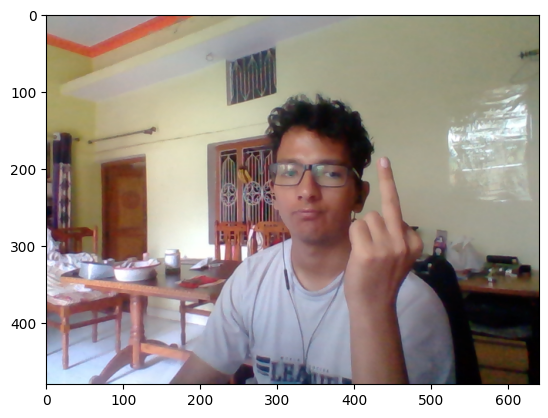

In [29]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

In [23]:
cap.release()

In [27]:
def take_photo():
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    cv2.imwrite('webcamphoto.jpg', frame)
    cap.release()

In [28]:
take_photo()

## 10. Render in Real Time

In [33]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # show image
    cv2.imshow('webcam', frame )

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()